<h1><center>Boston House Prices</center></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Boston_-_panoramio_%2823%29.jpg" style="width: 750px;"/>

   ### Introduction

The aim of this project is to analyse the Boston house prices dataset from the UCI Machine Learning Repository, by firstly using descriptive statistics and plots to describe the Boston House Prices, secondly using inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t and lastly to create a neural network that can predict the median house price based on the other variables in the dataset.

The Boston house price dataset consists of the price of houses in various places in Boston. The dataset also includes information on Crime (CRIM), average number of rooms per dwelling (RM), the age of people who own the house (AGE), neighbourhoods with more lower-class workers (LSTAT) and there are many other variable which can be seen below. This data was collected in 1978 and consists of only 506 cases.

### DATA

Import the data required to complete this project, using sklearn and display the shape and the features of this dataset. 

In [33]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import tensorflow as tf
import scipy.stats as ss

# Magic line in plt
%matplotlib inline

boston = load_boston()

# Print the no. of rows and columns
print("Shape of the dataset:", boston.data.shape) 

# Print the description of the dataset
print("\n", boston.DESCR) 

Shape of the dataset: (506, 13)

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate

## Part One - Descriptive Statistics

For part one, descriptive statistics and plots are to be completed to describe the Boston House Prices. A descriptive statistic is a summary statistic that quantitatively describes or summarizes features of a collection of information, while descriptive statistics is the process of using and analyzing those statistics [1]. Download the dataset and then calculate the minimum, maximum, mean, median, and standard deviation for each attribute and Price of the houses. 

In [34]:
# Converting data from nd-array to pandas dataframe, re-naming column names & Price Column
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 
data['PRICE'] = boston.target

# Print the first 5 rows of the dataset with four decimal places
data.head(5).round(4) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
# Run a summary statistics rounding to four deciaml place
data.describe().round(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


The above table provides percentile’s and other key statistics. The average house price in 1978 was \\$22,500 while min value was \\$5,000 with max value of \\$50,000. We can infer that the max number of rooms per dwelling is 8.78 while the min is 3.56 and mean of 6.2. Let's use this describe function to see some visualisation.

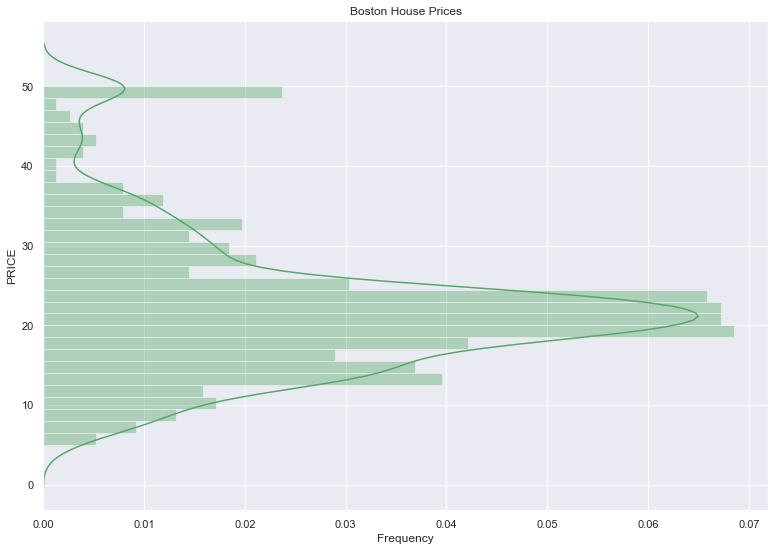

In [36]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a displot to show the 'Price'
sns.distplot(data['PRICE'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

As we can see from the plot above, the majority of the prices are around the $20,000 mark with a few outliners in the min and max values. Next show the skewness and kurtosis for the price of the houses by ud

In [37]:
#skewness and kurtosis
print("Skewness: %.2f" % data['PRICE'].skew())
print("Kurtosis: %.2f" % data['PRICE'].kurt())

Skewness: 1.11
Kurtosis: 1.50


The main difference between skewness and kurtosis is that the former talks of the degree of symmetry, whereas the latter talks of the degree of peakedness, in the frequency distribution [2]. As the price is above 1, the data is positively highly skewed. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode [3].

The krutosis is 1.495. This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic [3].

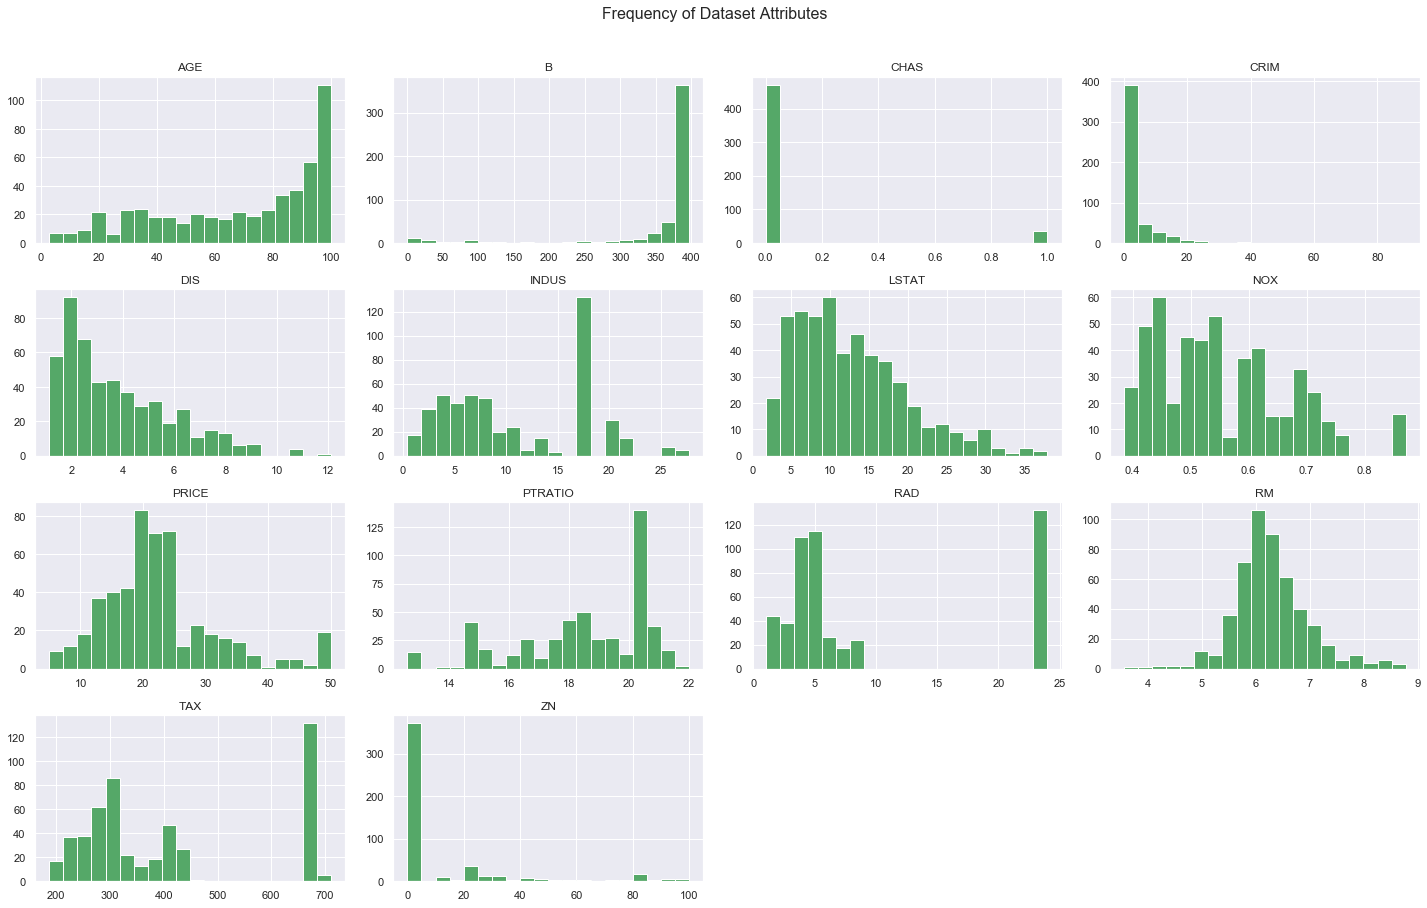

In [38]:
# Create a histogram for 
data.hist(bins=20,figsize=(20,12),grid=True, color='g')

# Title of Histogram
plt.suptitle('Frequency of Dataset Attributes', y=1.05, size=16)
plt.tight_layout()

The above plots a histogram for all attributes and price. It shows the frequency of the values that appear in the dataset. For example, if we look at that attribute CHAS (Charles River dummy variable), we can see that there are two 0 and 1 with the number of properties over 400 not tracting near the river and under 50 tracting near the property. BOth PRICE and RM have the closet relationship to normal distribution. 

AGE has a poitive skewness, this indicates that mean and median will be greater than the mode while LSTAT has negtive skewness indicating the mean and median will be less than the mode. For TAX, we find a large amount of the distribution is around 700. 

<Figure size 800x640 with 0 Axes>

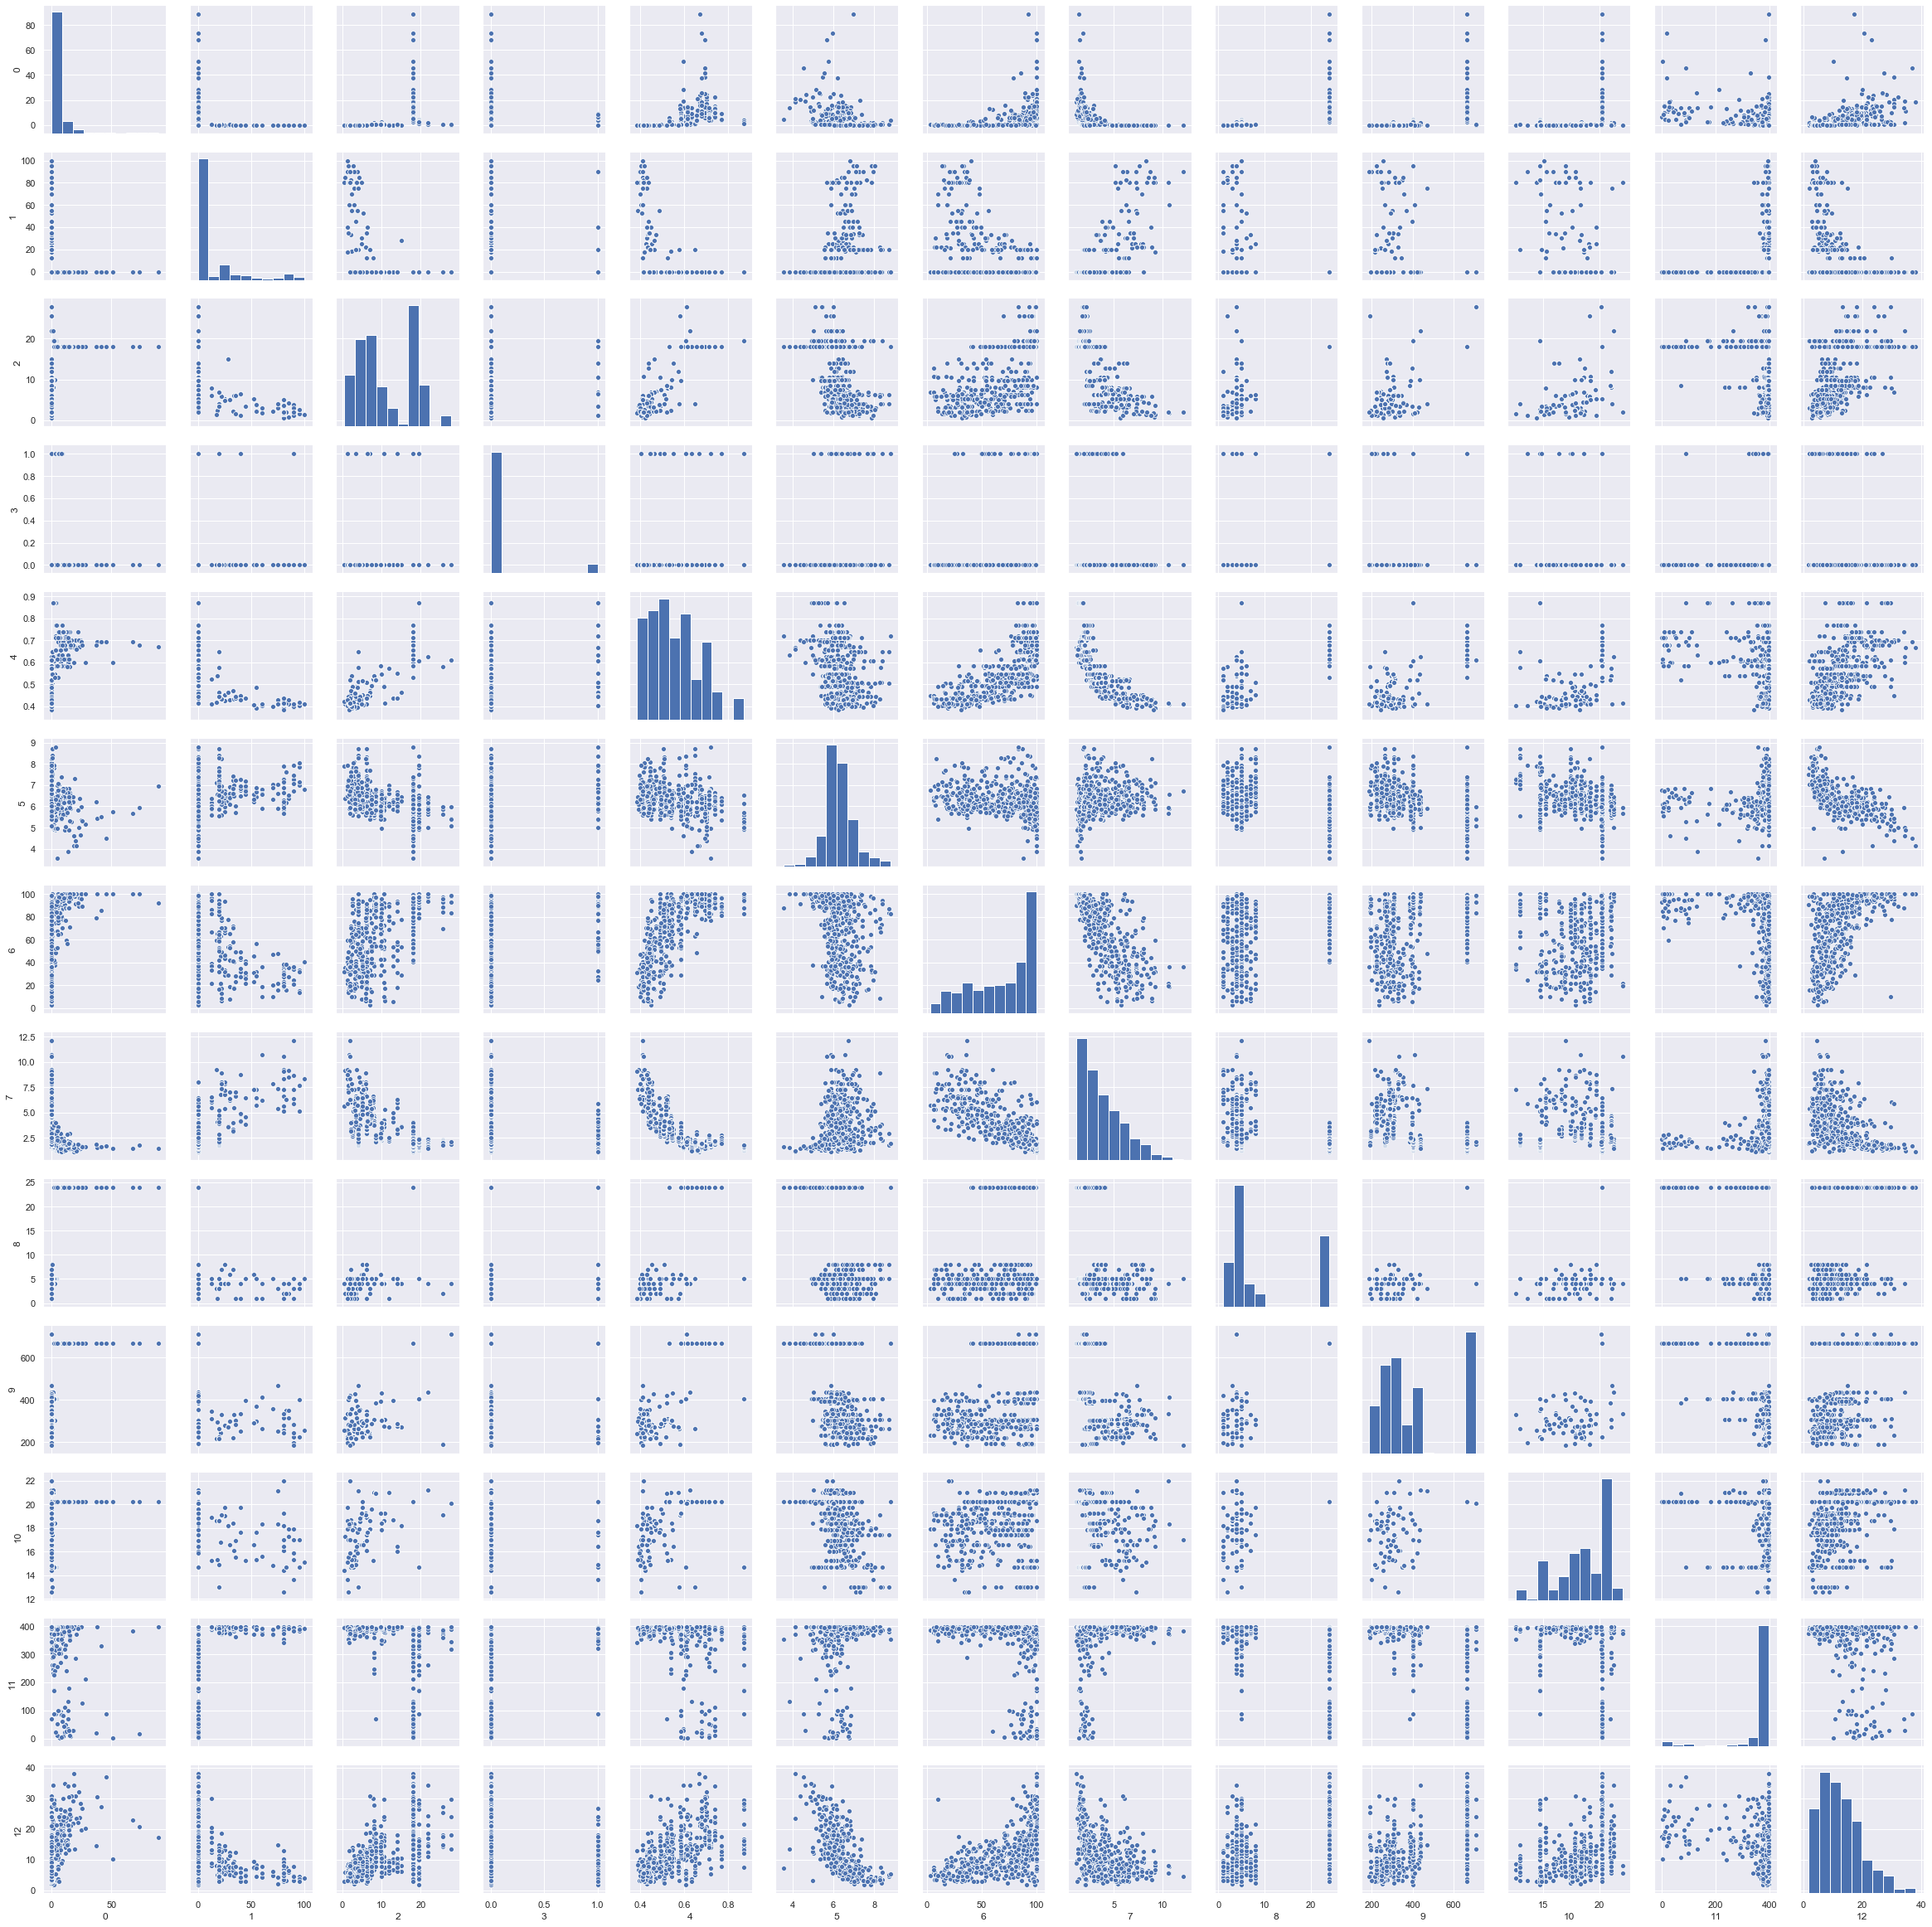

In [39]:
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
# Load Dataset
df = pd.DataFrame(boston.data) 

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df)
plt.show()

Let's show a number of attributes vs price to show the relationship between these two variables. Once completed, use linear regression for each of the variables. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ('RM', 'LSTAT'), and the other is considered to be a dependent ('Price') variable [4]. A dependent variable is a particular quantity that we ask a question about in our study. An explanatory variable is any factor that can influence the dependent variable. While there can be many explanatory variables, we will primarily concern ourselves with a single explanatory variable [5].A scatterplot can be a helpful tool in determining the strength of the relationship between two variables.[4]

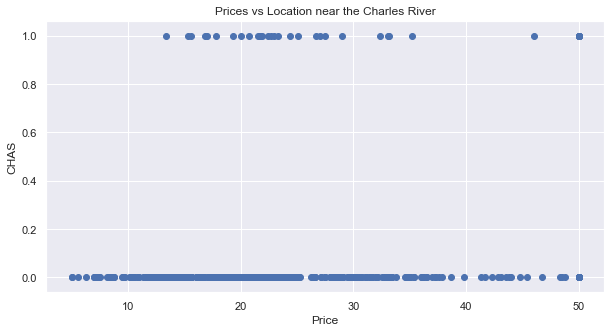

In [42]:
# Re-size the displot
sns.set(rc={'figure.figsize':(10,5)})

# Create a scatter plot comparing Price and CHAS
plt.scatter(data.PRICE,data.CHAS)

#Title
plt.title("Prices vs Location near the Charles River")       

# X and Y -axis description
plt.xlabel("Price")
plt.ylabel("CHAS")

#Print plot
plt.show()

The location near the Charles River does not have a massive impact of price of a house in Boston in 1978.

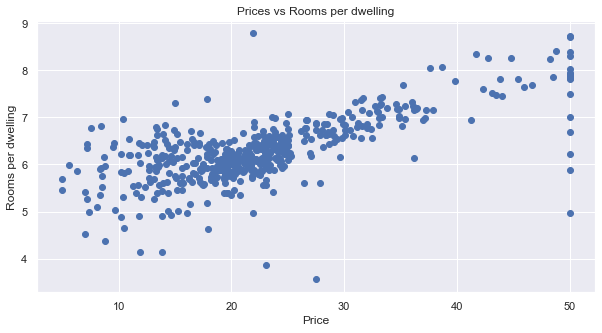

In [45]:
# Re-size the displot
sns.set(rc={'figure.figsize':(10,5)})

# Create a scatter plot comparing Price and CHAS
plt.scatter(data.PRICE,data.RM)

#Title
plt.title("Prices vs Rooms per dwelling")       

# X and Y -axis description
plt.xlabel("Price")
plt.ylabel("Rooms per dwelling")

#Print plot
plt.show()

From the plot show that the number of rooms increases the price of the property.

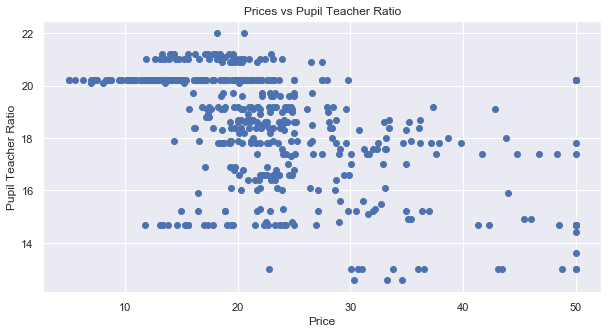

In [46]:
# Re-size the displot
sns.set(rc={'figure.figsize':(10,5)})

# Create a scatter plot comparing Price and CHAS
plt.scatter(data.PRICE,data.PTRATIO)

#Title
plt.title("Prices vs Pupil Teacher Ratio")       

# X and Y -axis description
plt.xlabel("Price")
plt.ylabel("Pupil Teacher Ratio")

#Print plot
plt.show()

Like the RM varaible,  plot shows that the number of pupil vs teacher ratio increases the price of the property.

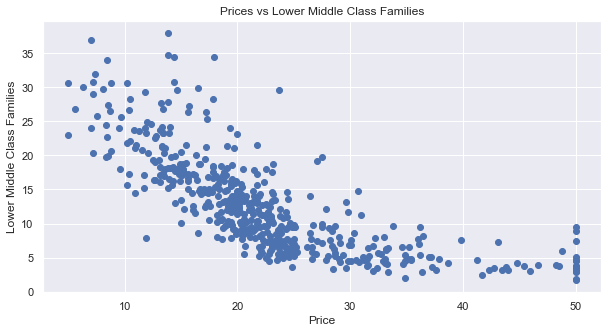

In [48]:
# Re-size the displot
sns.set(rc={'figure.figsize':(10,5)})

# Create a scatter plot comparing Price and CHAS
plt.scatter(data.PRICE,data.LSTAT)

#Title
plt.title("Prices vs Lower Middle Class Families")       

# X and Y -axis description
plt.xlabel("Price")
plt.ylabel("Lower Middle Class Families")

#Print plot
plt.show()

The plot shows that the number of lower middle class families has a negative impact on the price of houses.

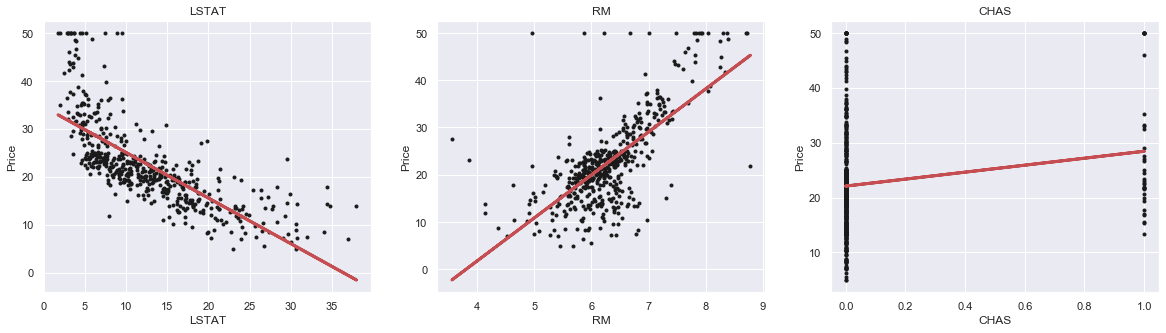

In [50]:
# Size the plot 
plt.figure(figsize=(20, 5))

# Plot for explanatory and dependent variables
explanatory = ['LSTAT', 'RM', 'CHAS']
dependent = data['PRICE']


# Loop over explanatory variables 
for i, col in enumerate(explanatory):
    plt.subplot(1, len(explanatory) , i+1)
    x = data[col]
    y = dependent
    
    # Do regression on the x and y arrays using numpy.
    m, c = np.polyfit(x, y, 1)
    
    # Plot x and y and the regression line in red.
    plt.plot(x, y, 'k.')
    plt.plot(x, m * x + c, 'r-', linewidth=3)
    
    # Title and x and y names
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')  

From the plots, we can see that the prices tend to decrease with more lower class workers (LSTAT - % lower status of the population) as lower class workers would have less money to spend on a home. While prices tend to rise with the increase in rooms in each dwelling (RM) as the more rooms in a house would increase the square footage making larger than one's with less rooms. The same can be said about tax income, if people earn less money it is likely that their home are worth less. 

We created a regression line in our scatterplot which is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). The formula for the best-fitting line (or regression line) is 
$$y = mx + c$$, where m is the slope of the line and c is the y-intercept [5]. 

## Part Two - Inferential Statistics

Statistical inference is the process of using data analysis to deduce properties of an underlying probability distribution [20]. Inferential statistical analysis for example will test if there are signiﬁcant diﬀerences in median house prices between houses that are along the Charles river and those that aren’t deriving estimates.

We will create a correlation matrix. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data usig the seaborn library [12]. The correlation coefficient ranges from -1 to 1. If the value is close to 1, this indicates there is a strong relationship between these two variables and the opposite can be said about if the value is closer to - 1. 

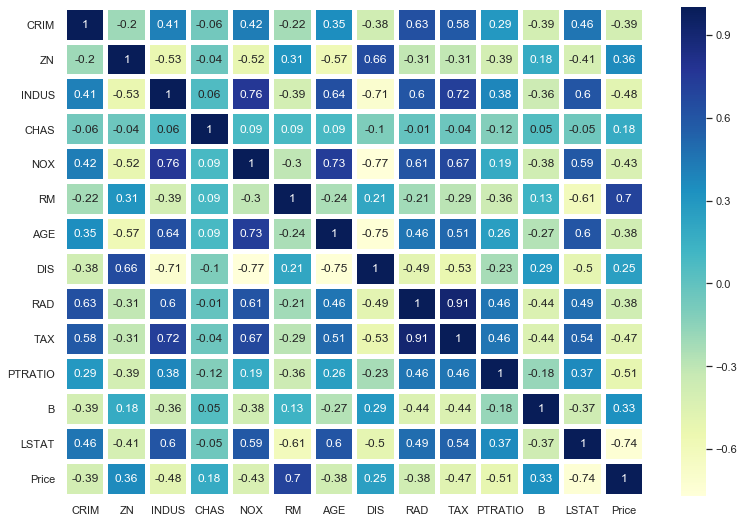

In [7]:
# create a matrix to show the interaction between variables. Round data to 2 deciaml places
correlation_matrix = data.corr().round(2)

# Use annot to input data into square wtth color "YlGnBu"
sns.heatmap(data=correlation_matrix, linewidths=4, annot=True, cmap="YlGnBu")

# Re-size the matrix
sns.set(rc={'figure.figsize':(15,8)})

From the correlation matrix, the number of room per dwelling 'RM' has the biggest positive impact on the price of a house at 0.70. Other's that have a positive impact price include 'ZN' (proportion of residential land zoned for lots over 25,000 sq.ft.) at 0.37, and 'B' (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) at 0.33.If you look at the negative impact of the price in the matrix, 'LSTAT' (LSTAT - % lower status of the population) is at -0.74 while 'PTRATIO' is at -0.51.

#### T-Tests

For part two, We will need to investigate the impact of the dummy variable, the Charles River has on the price of property. We will need to split the attribute 'CHAS' into two attributes near the river and one's that are not.

In [12]:
# Extract data for attribute near Charles river (NCR) and not near Charles River (NOCR)
NCR = data[data['CHAS'] == 1]['Price']
NOCR = data[data['CHAS'] == 0]['Price']

# Calculate the mean for near the Charles river
NCR.mean()
print("The mean price of property located near the Charles River:",NCR.mean())

The mean price of property located near the Charles River: 28.44


In [13]:
# Calculate the mean for not near the Charles River
NOCR.mean()
print("The mean price of property not located near the Charles River:",NOCR.mean())

The mean price of property not located near the Charles River: 22.093842887473482


As we can see from the data, the mean price of properties located near the river is higher than the properties located not near the river. There is a difference of over $6,000.

In [28]:
# Run an independent t-test 
stats.ttest_ind(NCR,NOCR)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [29]:
import statsmodels.stats.weightstats as ws
ws.ttest_ind(NCR, NOCR)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

Using both the independent stats.ttest and the weighted stats ttest, our null hypothesis is testing that houses located near and far from the Charles River that both groups are statistically significantly similar. Here, the p-value is less than 0.05, this indicates strong evidence against the null hypothesis, so the null hypothesis is rejected.

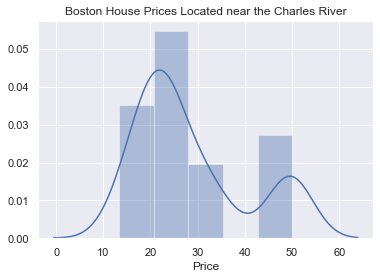

In [37]:
# Title
plt.title("Boston House Prices Located near the Charles River")       

#Print plot
sns.distplot(NCR)

We can see that the majority of the houses located near the Charles River is over $20k. We must take into consideration that our sample sides is small with only 35 properties located near the river compared with 471 not located near the river.

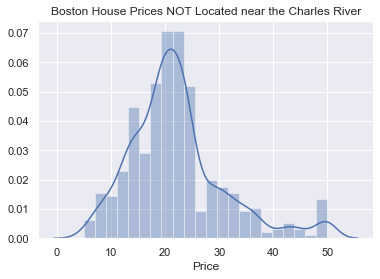

In [38]:
# Title
plt.title("Boston House Prices NOT Located near the Charles River")       

#Print plot
sns.distplot(NOCR)

We can see that the houses not located near the Charles River are spread evenly between \\$15k and $25k like our full dataset. Lets plot these two sets of data into one plot by created a new dataframe.

In [88]:
river_table = pd.crosstab(index=data['CHAS'], columns=['Price'])
river_table

col_0,Price
CHAS,
0.0,471
1.0,35


In [64]:
# Create a new variable for River Charles
River = ['Near'] * 35 + ['Far'] * 471

# Concat our two variables NCR & NOCR
Price = np.concatenate([NCR,NOCR])

# Create a new dataframe
df = pd.DataFrame({'River': River, 'Price': Price})

In [73]:
df[df['River'] == 'Near']['Price']

0     13.4
1     15.3
2     17.0
3     15.6
4     27.0
5     50.0
6     50.0
7     24.4
8     20.0
9     21.7
10    19.3
11    22.4
12    23.3
13    21.5
14    23.0
15    26.7
16    21.7
17    27.5
18    29.0
19    25.1
20    20.7
21    35.2
22    32.4
23    33.2
24    33.1
25    46.0
26    50.0
27    17.8
28    21.7
29    22.7
30    16.8
31    21.9
32    50.0
33    50.0
34    50.0
Name: Price, dtype: float64

In [60]:
df[df['River'] == 'Far']['Price']

Series([], Name: Price, dtype: float64)

In [74]:
ws.ttest_ind(df[df['River'] == 'Near']['Price'],df[df['River'] == 'Far']['Price'])

(3.9964374660905095, 7.390623170519883e-05, 504.0)

After breaking up the data, we can see that the original probability value remains the same and indicates that these are not statistically similarstatistics.

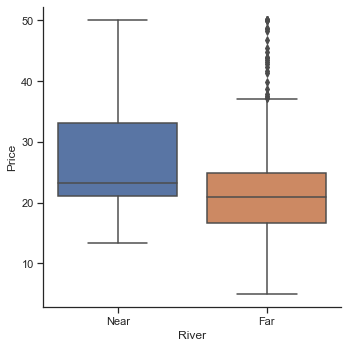

In [86]:
# Display catplot
sns.catplot(x='River', y='Price', data=df, kind="box")

Finally we use a catplot to show the distribution of the price between the two variables with the shape showing the mean price with a few outliners.

 # https://www.datavedas.com/inferential-statistics-in-python/

#### ANOVA with stat models

Next separate data into training and testing sets. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

After a model has been processed by using the training set, you test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct [15].

Before splitting the data to train-test dataset, we would need to split the dataset into two attributes - target value and predictor value.[16]


In [119]:
# Two variables
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['Price']

# Split dataset into train and test. Test portion 33% test size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print("X Train :",X_train.shape)
print("X Test  :",X_test.shape)
print("Y Train :",Y_train.shape)
print("X Test  :",Y_test.shape)

X Train : (339, 2)
X Test  : (167, 2)
Y Train : (339,)
X Test  : (167,)


The train spilt has 339 while test split is 167. This gives us a total of 506

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

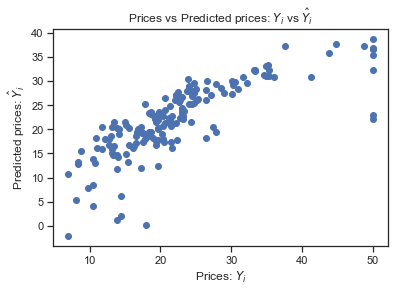

In [120]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean Square Error
To check the level of error of a model, we can Mean Squared Error. It will check the difference between actual value and the predicted value. For the full theory.[15]

In [121]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

34.71949123964307


That means that the model isn’t a really great linear model. But, as a start, it is a good way to go. I actually still don’t understand how to know the value of acceptable mean squared error.[15]

Split the data into training and testing subsets. the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [122]:
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# We will evaluate our model using RMSE and R2-score
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.336540235231381
R2 score is 0.6432412744361098


The model performance for testing set
--------------------------------------
RMSE is 5.892324773775039
R2 score is 0.6296344935050338


## Part 3 - Neural Network

In [ ]:
# http://www.neural.cz/dataset-exploration-boston-house-pricing.html

In [73]:
# https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [74]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=339, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 339 samples, validate on 167 samples
Epoch 1/339
339/339 [==============================] - 1s 2ms/step - loss: 361.8283 - mean_absolute_error: 17.5928 - val_loss: 263.0469 - val_mean_absolute_error: 14.8686
Epoch 2/339
339/339 [==============================] - 0s 188us/step - loss: 185.5096 - mean_absolute_error: 12.4975 - val_loss: 101.7050 - val_mean_absolute_error: 9.2079
Epoch 3/339
339/339 [==============================] - 0s 88us/step - loss: 54.9001 - mean_absolute_error: 6.6316 - val_loss: 13.9317 - val_mean_absolute_error: 3.3430
Epoch 4/339
339/339 [==============================] - 0s 76us/step - loss: 3.9736 - mean_absolute_error: 1.4387 - val_loss: 1.0640 - val_mean_absolute_error: 0.9828
Epoch 5/339
339/339 [==============================] - 0s 68us/step - loss: 2.9210 - mean_absolute_error: 1.6065 - val_loss: 3.1062 - val_mean_absolute_error: 1.6787
Epoch 6/339
339/339 [==============================] - 0s 62us/

339/339 [==============================] - 0s 56us/step - loss: 0.0092 - mean_absolute_error: 0.0771 - val_loss: 0.0130 - val_mean_absolute_error: 0.0838
Epoch 98/339
339/339 [==============================] - 0s 53us/step - loss: 0.0088 - mean_absolute_error: 0.0682 - val_loss: 0.0130 - val_mean_absolute_error: 0.0789
Epoch 99/339
339/339 [==============================] - 0s 65us/step - loss: 0.0084 - mean_absolute_error: 0.0694 - val_loss: 0.0121 - val_mean_absolute_error: 0.0803
Epoch 100/339
339/339 [==============================] - 0s 65us/step - loss: 0.0081 - mean_absolute_error: 0.0690 - val_loss: 0.0118 - val_mean_absolute_error: 0.0775
Epoch 101/339
339/339 [==============================] - 0s 62us/step - loss: 0.0078 - mean_absolute_error: 0.0653 - val_loss: 0.0114 - val_mean_absolute_error: 0.0760
Epoch 102/339
339/339 [==============================] - 0s 65us/step - loss: 0.0075 - mean_absolute_error: 0.0670 - val_loss: 0.0108 - val_mean_absolute_error: 0.0759
Epoch 10

Epoch 192/339
339/339 [==============================] - 0s 59us/step - loss: 5.5729e-05 - mean_absolute_error: 0.0062 - val_loss: 7.2408e-05 - val_mean_absolute_error: 0.0069
Epoch 193/339
339/339 [==============================] - 0s 65us/step - loss: 5.1982e-05 - mean_absolute_error: 0.0060 - val_loss: 6.8968e-05 - val_mean_absolute_error: 0.0065
Epoch 194/339
339/339 [==============================] - 0s 58us/step - loss: 4.9708e-05 - mean_absolute_error: 0.0057 - val_loss: 6.2140e-05 - val_mean_absolute_error: 0.0067
Epoch 195/339
339/339 [==============================] - 0s 55us/step - loss: 4.5120e-05 - mean_absolute_error: 0.0056 - val_loss: 6.1001e-05 - val_mean_absolute_error: 0.0059
Epoch 196/339
339/339 [==============================] - 0s 65us/step - loss: 4.1549e-05 - mean_absolute_error: 0.0052 - val_loss: 5.3639e-05 - val_mean_absolute_error: 0.0062
Epoch 197/339
339/339 [==============================] - 0s 59us/step - loss: 4.0063e-05 - mean_absolute_error: 0.0053 -

Epoch 283/339
339/339 [==============================] - 0s 58us/step - loss: 1.1195e-07 - mean_absolute_error: 2.4104e-04 - val_loss: 1.8047e-07 - val_mean_absolute_error: 2.5091e-04
Epoch 284/339
339/339 [==============================] - 0s 62us/step - loss: 9.0109e-08 - mean_absolute_error: 1.9074e-04 - val_loss: 2.0382e-07 - val_mean_absolute_error: 2.2917e-04
Epoch 285/339
339/339 [==============================] - 0s 62us/step - loss: 8.3405e-08 - mean_absolute_error: 1.7662e-04 - val_loss: 1.7844e-07 - val_mean_absolute_error: 2.1763e-04
Epoch 286/339
339/339 [==============================] - 0s 65us/step - loss: 1.1308e-07 - mean_absolute_error: 2.2916e-04 - val_loss: 2.1662e-07 - val_mean_absolute_error: 2.3283e-04
Epoch 287/339
339/339 [==============================] - 0s 65us/step - loss: 1.0027e-07 - mean_absolute_error: 1.9888e-04 - val_loss: 2.6220e-07 - val_mean_absolute_error: 2.8164e-04
Epoch 288/339
339/339 [==============================] - 0s 59us/step - loss: 8.

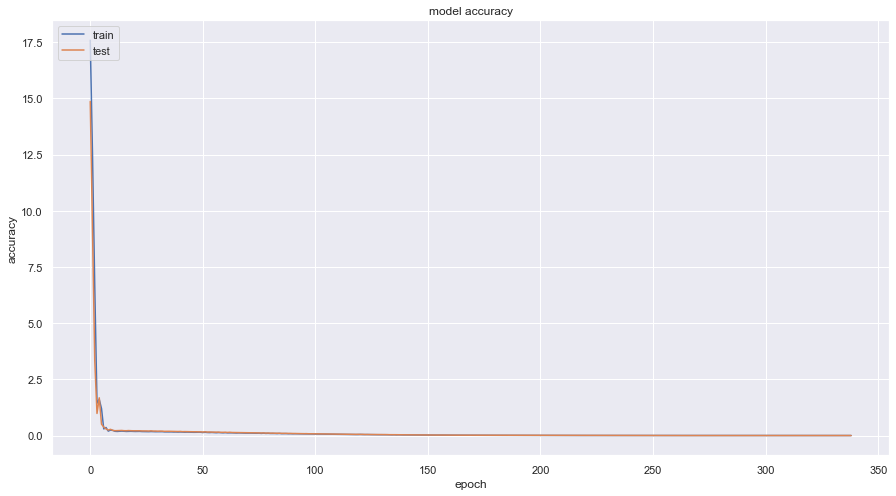

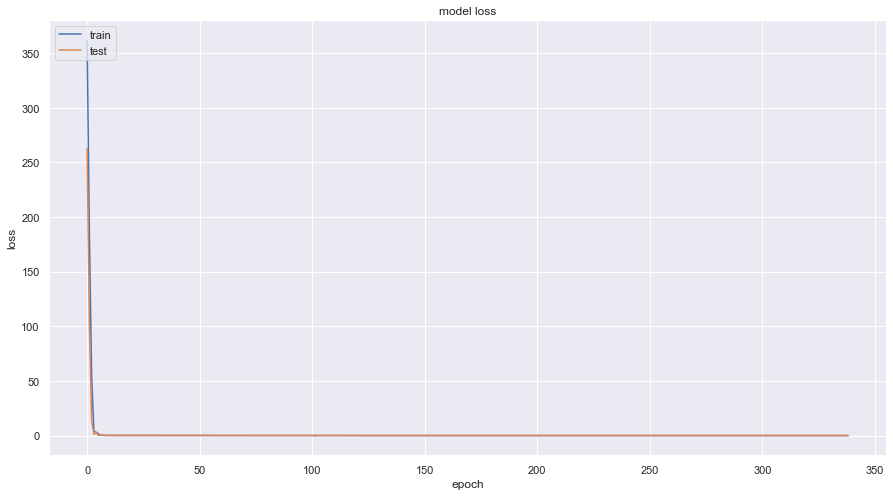

In [76]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This result is not very good and gives us a mean absolute error just above 20000 dollars. I beleive this model performs bad due to the fact that we have a quite small data-set becuase a neural network performs the best when having a big dataset[19]

In [ ]:
# https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

# https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

# https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

# https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/3.6-predicting-house-prices.nb.html

# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

# https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

### https://medium.com/@cyrilivargarcia/tensorflow-and-keras-a-beginners-tutorial-by-a-beginner-abd4c90f814f

### References

1. https://en.wikipedia.org/wiki/Descriptive_statistics

2. https://keydifferences.com/differences-between-skewness-and-kurtosis.html

3. https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

4. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

5. https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/

1. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

5. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

7. https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html?source=post_page---------------------------

8. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

9. https://www.kaggle.com/sagarnildass/predicting-boston-house-prices

11. https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

12. https://www.displayr.com/what-is-a-correlation-matrix/

15. https://docs.microsoft.com/en-us/analysis-services/data-mining/training-and-testing-data-sets

[20] https://en.wikipedia.org/wiki/Statistical_inference